In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import fft

In [16]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
       0.5 * np.random.randn(time_vec.size)

In [17]:
sample_freq = fft.fftfreq(sig.size, d=time_step)
sig_fft = fft.fft(sig)

In [18]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

freq = freqs[power.argmax()]
print(np.allclose(freq, 1./period) ) # 检查是否找到了正确的频率

True


In [19]:
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

d:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


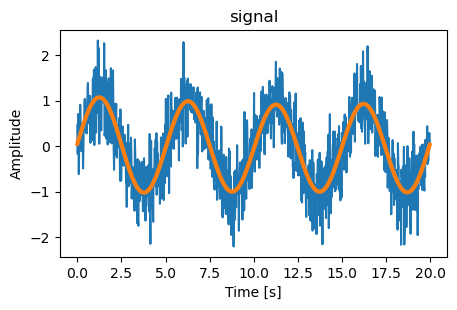

In [20]:
plt.figure(figsize=(5, 3), dpi=100)
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.title("signal")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()